## 成绩信息画像

In [1]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
student_info=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\2_student_info.csv")
chengji=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\5_chengji.csv")
exam_type=pd.read_csv(r"D:\Entertainment\Heaven Pool\education_data\6_exam_type.csv")

In [2]:
# 当前在校学生信息
student_info.columns=[u'学生id',u'学生姓名',u'性别',u'民族',u'出生日期',u'班级名',u'家庭住址',u'家庭类型',u'政治面貌',u'班级id',u'班级学期',u'是否住校',u'是否退学',u'宿舍号']
# student_info['是否退学'].fillna(value=0) #将NaN替换为0
#print(student_info.dtypes) # 查看dataframe中的数据类型
# 将班级分为高一，高二，高三
student_info['年级名']=student_info['班级名']
student_info['年级名'][student_info['年级名'].str.contains('高一')]=u'高一'
student_info['年级名'][student_info['年级名'].str.contains('高二')]=u'高二'
student_info['年级名'][student_info['年级名'].str.contains('高三')]=u'高三'
student_info.head()

,学生id,学生姓名,性别,民族,出生日期,班级名,家庭住址,家庭类型,政治面貌,班级id,班级学期,是否住校,是否退学,宿舍号,年级名
0,14454,陈某某,女,汉族,2001.0,白-高二(01),宁波,城镇,共青团员,901,2018-2019-1,NaN,NaN,NaN,高二
1,14479,曹某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,315.0,高二
2,14486,金某某,男,汉族,NaN,白-高二(01),NaN,城镇,共青团员,901,2018-2019-1,1.0,NaN,321.0,高二
3,14549,张某某,女,汉族,2002.0,白-高二(07),浙江平湖,城镇,共青团员,907,2018-2019-1,NaN,NaN,NaN,高二
4,14550,张某某,女,汉族,2001.0,白-高二(04),浙江宁波,城镇,共青团员,904,2018-2019-1,NaN,NaN,NaN,高二


In [3]:
n_student=student_info['学生id'].unique().shape[0]
n_class=student_info['班级名'].unique().shape[0]
n_term=student_info['班级学期'].unique().shape[0]
print("学生信息_学生数量：",n_student)
print('学生信息_班级数量：',n_class)
print('学生信息_学期数量：',n_term)
print('学生信息_学期分布：',student_info['班级学期'].unique())
print("学生信息_是否退学：",student_info['是否退学'].unique())

学生信息_学生数量： 1765
学生信息_班级数量： 46
学生信息_学期数量： 1
学生信息_学期分布： ['2018-2019-1']
学生信息_是否退学： [nan '1' ' ']


In [4]:
# 学生成绩
chengji.columns=['考试id','考试编号','考试编码名称','考试学科id','考试学科名','考试学期','考试类型','考试开始时间','学生id','考试成绩','Z_score','T_score','等第']
# 使用pandas的to_datatime函数转换为标准日期格式
chengji['考试开始时间']=pd.to_datetime(chengji['考试开始时间'])
chengji.head()

,考试id,考试编号,考试编码名称,考试学科id,考试学科名,考试学期,考试类型,考试开始时间,学生id,考试成绩,Z_score,T_score,等第
0,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13539,-2.0,NaN,NaN,NaN
1,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13548,90.0,1.074511,88.59608,0.137615
2,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13551,91.0,1.194145,89.55315,0.091743
3,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13555,-2.0,NaN,NaN,NaN
4,136424,282,2017年9月宁波市“十校联考”,17.0,政治,2017-2018-1,7,2017-09-20,13559,-2.0,NaN,NaN,NaN


In [5]:
print('学生成绩中学期数量:',chengji['考试学期'].unique())
print('学生成绩中考试数量',chengji['考试编号'].unique().shape[0])
xueqi=chengji.ix[chengji['考试学期']=='2018-2019-1']
print('2018-2019-1学期考试：',xueqi['考试编码名称'].unique())

学生成绩中学期数量: ['2017-2018-1' '2016-2017-2' '2014-2015-1' '2015-2016-1' '2014-2015-2'
 '2017-2018-2' '2018-2019-1' '2013-2014-1' '2013-2014-2' '2015-2016-2'
 '2016-2017-1']
学生成绩中考试数量 86
2018-2019-1学期考试： ['2018学年度第一学期平时成绩1' '2018学年第一学期高三五校联考' '2018-1学期期中考试' '2018学年度第一学期平时成绩2'
 '2018-1考查课总评' '2018学年第一学期高三十校联考' '2018-1学期期末考试' '\t2018学年第一学期期末总评']


学生成绩表中的学期数量有11个，从2013年到2019年,总共有86个考试

### 1.1  作弊、缺考、免考学生统计

In [28]:
chengji1=chengji
# 第一种表达方式：统计各个学期中作弊、缺考、免考的学生数量分布
special1=chengji1.ix[chengji1['考试成绩']==-1]
special2=chengji1.ix[chengji1['考试成绩']==-2]
special3=chengji1.ix[chengji1['考试成绩']==-3]
special=pd.concat([special1,special2,special3],axis=0)
print(special['考试成绩'].unique())
print(special.shape[0])
special.head()
# 第二种表达方式：在多个逻辑条件下，用& 或者|，
# chengji.ix[(chengji['考试成绩']==-1)|(chengji['考试成绩']==-2)|(chengji['考试成绩']==-3)]


[-1. -2. -3.]
48981


,考试id,考试编号,考试编码名称,考试学科id,考试学科名,考试学期,考试类型,考试开始时间,学生id,考试成绩,Z_score,T_score,等第
26632,136947,284,2017学年度第一学期期中考试,2.0,数学,2017-2018-1,2,2017-11-15,13956,-1.0,NaN,NaN,NaN
26667,136947,284,2017学年度第一学期期中考试,2.0,数学,2017-2018-1,2,2017-11-15,14295,-1.0,NaN,NaN,NaN
229324,120036,222,2013-2014年第一学期期末考试,1.0,语文,2013-2014-1,3,2014-01-18,11055,-1.0,NaN,NaN,NaN
316188,127884,252,2015学年第一学期期末考查课总评,9.0,体育,2015-2016-1,5,2016-01-12,11973,-1.0,NaN,NaN,NaN
383944,129064,253,2015学年第一学期期末考试,5.0,化学,2015-2016-1,3,2016-01-23,12232,-1.0,NaN,NaN,NaN


<Figure size 720x720 with 0 Axes>

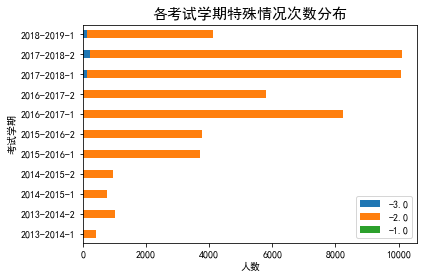

In [29]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(10,10))
test=special.groupby(['考试学期','考试成绩'])['学生id'].count()
test=test.unstack().plot(kind='barh',width=0.4,stacked=True) # 设置柱子的宽度
plt.xticks(color='black',rotation=0) # 对x轴坐标设置颜色以及倾斜度
plt.xlabel('人数',rotation=0)
plt.ylabel('考试学期')
plt.title('各考试学期特殊情况次数分布',fontsize=15)
plt.legend()
plt.show()

In [30]:
test1=special.groupby(['考试学期','考试成绩'])['学生id'].count().unstack()
test1.columns=['作弊','缺考','免考']
zuobi=test1['作弊'].values
quekao=test1['缺考'].values
miankao=test1['免考'].values
index=test1.index
from pyecharts import Bar
bar=Bar('各学期特殊情况次数')
bar.add('作弊',index,zuobi)
bar.add('缺考',index,quekao)
bar.add('免考',index,miankao,xaxis_rotate=40)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\特殊情况.html')
bar

##### 考试成绩(-1为作弊，-2为缺考，-3为免考)；从上图可知：去年缺考的人数是最多的。

‘line’：折线图
‘bar’ :条形图
‘barh’：横向条形图
‘hist’：柱状图
‘box’ ：箱线图
‘kde’ :密度估计图，主要对柱状图添加Kernel 概率密度线
‘area’ : 面积图
‘pie’ : 饼图
‘scatter’：散点图

### 1.2  原始分度量

<Figure size 6480x6480 with 0 Axes>

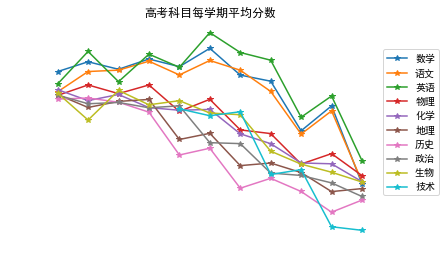

In [34]:
chengji2=chengji
# 删除成绩表中的特殊情况
# 按列条件筛选、删除DataFrame的整行     data.name.isin([筛选元素])  https://blog.csdn.net/shuihupo/article/details/82842524
# 对dataframe的某列（name为列名）进行筛选，加负号的原因是想删除符合条件的行，不写负号是筛选出符合条件的行
special=chengji2.ix[(chengji2['考试成绩']==-1)|(chengji2['考试成绩']==-2)|(chengji2['考试成绩']==-3)]
score=chengji2[-chengji2['考试成绩'].isin(special1['考试成绩'])]

# 汇总各科成绩变化趋势
score1=chengji2.groupby(['考试学科名','考试学期'])['考试成绩'].mean().unstack().T

# 选取score中常见科目（选择列）
score1=pd.DataFrame(score1,columns=['数学','语文','英语','物理','化学','地理','历史','政治','生物','技术'])

fig=plt.figure(figsize=(90,90))
fig.set(alpha=0.2)
score1.plot(kind='line',marker = "*")
plt.title('高考科目每学期平均分数')
plt.legend(bbox_to_anchor=(1.2, 0.9))#bbox_to_anchor：表示legend的位置，前一个表示左右，后一个表示上下
# plt.grid(True)
plt.xticks([])  #去掉刻度的方法
plt.axis('off') # 关闭坐标轴
plt.ylabel('平均分数')
plt.show()

In [33]:
from pyecharts import Line
shuxue=np.trunc(score1['数学'].values)# trunc:对数组中元素整体截取，链接：https://blog.csdn.net/pipisorry/article/details/41214819
yuwen=np.trunc(score1['语文'].values)
yingyu=np.trunc(score1['英语'].values)
wuli=np.trunc(score1['物理'].values)
huaxue=np.trunc(score1['化学'].values)
dili=np.trunc(score1['地理'].values)
lishi=np.trunc(score1['历史'].values)
zhengzhi=np.trunc(score1['政治'].values)
shengwu=np.trunc(score1['生物'].values)
jishu=np.trunc(score1['技术'].values)
index=score1.index
line=Line('高考科目每学期平均分数')
line.add('数学',index,shuxue,mark_point=['max','min'])
line.add('语文',index,yuwen,mark_point=['max','min'])
line.add('英语',index,yingyu,mark_point=['max','min'])
line.add('物理',index,wuli,mark_point=['max','min'])
line.add('化学',index,huaxue,mark_point=['max','min'])
line.add('地理',index,dili,mark_point=['max','min'])
line.add('政治',index,zhengzhi,mark_point=['max','min'])
line.add('生物',index,shengwu,mark_point=['max','min'])
line.add('技术',index,jishu,mark_point=['max','min'],legend_pos ='right',legend_top ='top',xaxis_rotate=40,is_more_utils  =True)#, legend_orient='vertical'
line.render(path=r'D:\Entertainment\Heaven Pool\score_information\平均分数.html')
line
#legend_top ='top'/center/bottom

##### 从上图中可以看出：高考科目的平均分数在逐年下降，应该加强对学生的教育

### 通用配置项都在add()中进行配置


bar.add("statistics", stat_attr, stat_v , mark_point=['max', 'min'],mark_line=["average"],is_label_show =True,
        label_pos ='inside',label_formatter='{c}',xaxis_interval =0,is_datazoom_show =True,legend_pos ='right',legend_top ='center',legend_orient='vertical',xaxis_rotate=40,is_more_utils  =True)

is_convert=True:is_convert 交换 XY 轴

dataZoom 组件用于区域缩放，达到能自由关注细节的数据信息，或者概览数据整体，或者去除离群点的影响。

'slider' 类型:有单独的滑动条，用户在滑动条上进行缩放或漫游。加入is_label_show=True, is_datazoom_show=True即可。

'inside' 类型:内置于坐标系中，使用户可以在坐标系上通过鼠标拖拽、鼠标滚轮、手指滑动（触屏上）来缩放或漫游坐标系。

### 1.3  离均值度量

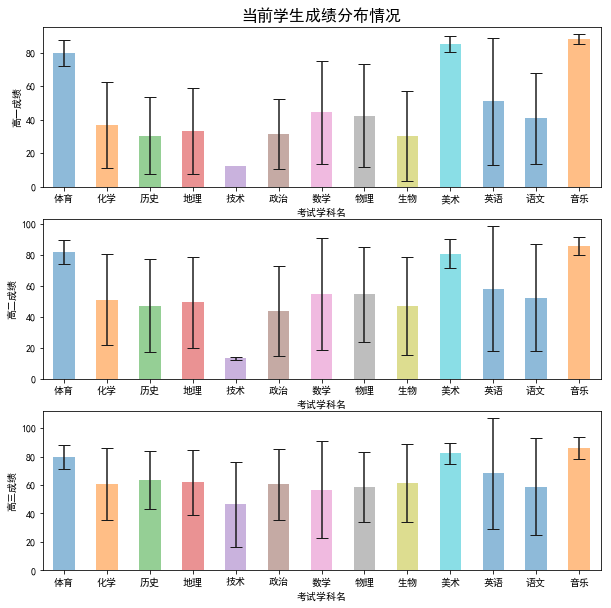

In [35]:
chengji3=chengji
special3=chengji3.ix[(chengji3['考试成绩']==-1)|(chengji3['考试成绩']==-2)|(chengji3['考试成绩']==-3)]
score1=chengji3[-chengji3['考试成绩'].isin(special3['考试成绩'])]
# 合并学生成绩和当前学生信息(当前学生学习情况)
current=pd.merge(score1,student_info,on='学生id')
cur_score=current.groupby(['年级名','考试学科名'])['考试成绩'].agg(['mean','std'])# count:非NA的数量；mean：非NA的平均值；std:标准差
cur_score.unstack()

fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.2)

plt.subplot(3,1,1)
gao1=cur_score.loc['高一'].unstack()
std1=gao1.loc['std']
gao1.loc['mean'].plot(kind='bar',yerr=std1 ,align='center',error_kw={'ecolor':'0.1','capsize':6},width=0.5,alpha=0.5)
plt.title('当前学生成绩分布情况',fontsize=16)
plt.ylabel('高一成绩')
plt.xticks(rotation=0)

plt.subplot(3,1,2)
gao2=cur_score.loc['高二'].unstack()
std2=gao2.loc['std']
gao2.loc['mean'].plot(kind='bar',yerr=std2 ,align='center',error_kw={'ecolor':'0.1','capsize':6},width=0.5,alpha=0.5)
# plt.title('当前高二学生成绩分布情况')
plt.ylabel('高二成绩')
plt.xticks(rotation=0)



plt.subplot(3,1,3)
gao3=cur_score.loc['高三'].unstack()
std3=gao3.loc['std']
gao3.loc['mean'].plot(kind='bar',yerr=std3 ,align='center',error_kw={'ecolor':'0.1','capsize':6},width=0.5,alpha=0.5)
plt.ylabel('高三成绩')
plt.xticks(rotation=0)

plt.show()

In [36]:
cur_score1=current.groupby(['年级名','考试学科名'])['考试成绩'].agg(['std'])# count:非NA的数量；mean：非NA的平均值；std:标准差
cur_score1.unstack()

gaoyi=cur_score1.loc['高一']
gaoer=cur_score1.loc['高二']
gaosan=cur_score1.loc['高三']

gaoyi2=np.fix(gaoyi.values)  # np.fix:Round to nearest integer towards zero.
gaoer2=np.fix(gaoer.values)
gaosan2=np.fix(gaosan.values)
index=gaoyi.index
from pyecharts import Line
line=Line('当前信息表中学生各科成绩标准差')
line.add('高一',index,gaoyi2)
line.add('高二',index,gaoer2)
line.add('高三',index,gaosan2)
line.render(path=r'D:\Entertainment\Heaven Pool\score_information\成绩标准差.html')
line

### 1.5  全年级排名（针对2018-1学期末考试）

In [18]:
paiming=pd.merge(student_info,score,on='学生id')  # 删除特殊情况的考生
# 最新考试排名   针对2018学年第一学期期末总评（不要这部分）

#print('合并后学期数：',paiming['考试学期'].unique())
#new_time=sorted(paiming['考试开始时间'],reverse=True)[0] # 对考试时间排序得到最新的考试
#new_kao=paiming.ix[paiming['考试开始时间']==new_time]# 最近的考试
#new_kao=new_kao[['学生id','学生姓名','班级名','年级名','考试编码名称','考试学科名','考试成绩']]
#print('合并后年级名:',new_kao['年级名'].unique())
#new_kao.head(3)


# 筛选2018-1学期期末考试作为统计的原始数据
qimo=paiming.ix[paiming['考试编码名称']=='2018-1学期期末考试']
print('2018年期末：',qimo['年级名'].unique())
print('2018年期末考试学科名：',qimo['考试学科名'].unique())  # 2018年期末考试学科名中都为空值
qimo=qimo[['学生id','学生姓名','班级名','年级名','考试编码名称','考试学科名','考试成绩']]
print(qimo.head())

# 各班级在各年级中的排名
qimo1=qimo.groupby(['年级名','班级名'])['考试成绩'].mean()
gao1=qimo1.ix['高一']
gao2=qimo1.ix['高二']
gao3=qimo1.ix['高三']
index1=gao1.index
value1=np.floor(gao1.values)
gao1_mean=value1.mean()
gao1_value=np.ceil(value1-gao1_mean)
from pyecharts import Bar
bar=Bar('2018年期末考试高一各班成绩分布','各班平均成绩-全年级平均成绩')
bar.add('高一',index1,gao1_value,mark_point=['max','min'],label_color=['#404a59'],xaxis_rotate=40)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\高一各班平均分值.html')
bar

2018年期末： ['高二' '高一' '高三']
2018年期末考试学科名： [nan]
      学生id 学生姓名       班级名 年级名        考试编码名称 考试学科名   考试成绩
109  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN   83.0
110  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN   55.0
111  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN   78.0
112  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN   67.0
113  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN  110.0


 颜色RGB：'#C1232B','#B5C334','#FCCE10','#E87C25','#27727B',
                           '#FE8463','#9BCA63','#FAD860','#F3A43B','#60C0DD',
                           '#D7504B','#C6E579','#F4E001','#F0805A','#26C0C0'

In [19]:
index2=gao2.index
value2=np.floor(gao2.values)
gao2_mean=value2.mean()
gao2_value=np.ceil(value2-gao2_mean)
from pyecharts import Bar
bar=Bar('2018年期末考试高二各班成绩分布','各班平均成绩-全年级平均成绩')
bar.add('高二',index2,gao2_value,mark_point=['max','min'],label_color=['#404a59'],xaxis_rotate=40)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\高二各班平均分值.html')
bar

In [20]:
index3=gao3.index
value3=np.floor(gao3.values)
gao3_mean=value3.mean()
gao3_value=np.ceil(value3-gao3_mean)
from pyecharts import Bar
bar=Bar('2018年期末考试高三各班成绩分布','各班平均成绩-全年级平均成绩')
bar.add('高三',index3,gao3_value,mark_point=['max','min'],label_color=['#404a59'],xaxis_rotate=40)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\高三各班平均分值.html')
bar

In [21]:
sum_score=qimo.groupby(['年级名','学生id'])['考试成绩'].sum()
gao1_score=sum_score.ix['高一']
#gao1_score.values
#gao1_score.index
gao1_score=gao1_score.sort_values(ascending=False)[0:100].reset_index()
gao1_score['排名']=gao1_score['学生id']
for i in range(gao1_score.shape[0]):
    gao1_score.iloc[i,2]=i+1
from pyecharts import Bar
bar=Bar('2018年期末考试高一前100名')
bar.add('总分',gao1_score['学生id'],gao1_score['考试成绩'],mark_point=['max'],label_color=['#404a59'],xaxis_rotate=40,legend_pos ='center',legend_top ='top',is_datazoom_show=True)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\高一前100名.html')
bar

In [22]:
gao2_score=sum_score.ix['高二']
gao2_score=gao2_score.sort_values(ascending=False)[0:100].reset_index()
#gao1_score['排名']=gao1_score['学生id']
#for i in range(gao1_score.shape[0]):
    #gao1_score.iloc[i,2]=i+1
from pyecharts import Bar
bar=Bar('2018年期末考试高二前100名')
bar.add('总分',gao2_score['学生id'],gao2_score['考试成绩'],mark_point=['max','min'],label_color=['#404a59'],xaxis_rotate=40,legend_pos ='center',legend_top ='top',is_datazoom_show=True)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\高二前100名.html')
bar

In [23]:
gao3_score=sum_score.ix['高三']
gao3_score=gao3_score.sort_values(ascending=False)[0:100].reset_index()
from pyecharts import Bar
bar=Bar('2018年期末考试高三前100名')
bar.add('总分',gao3_score['学生id'],gao3_score['考试成绩'],mark_point=['max','min'],label_color=['#404a59'],xaxis_rotate=40,legend_pos ='center',legend_top ='top',is_datazoom_show=True)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\高三前100名.html')
bar

DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')  
#### 参数说明    
axis:{0 or ‘index’, 1 or ‘columns’}, default 0，默认按照索引排序，即纵向排序，如果为1，则是横向排序    
by:str or list of str；如果axis=0，那么by="列名"；如果axis=1，那么by="行名"；  
ascending:布尔型，True则升序，可以是[True,False]，即第一字段升序，第二个降序  
inplace:布尔型，是否用排序后的数据框替换现有的数据框  
kind:排序方法，{‘quicksort’, ‘mergesort’, ‘heapsort’}, default ‘quicksort’。似乎不用太关心  
na_position : {‘first’, ‘last’}, default ‘last’，默认缺失值排在最后面  

### 1.6  全班排名

In [24]:
paiming=pd.merge(student_info,score,on='学生id')  # 删除特殊情况的考生
# 筛选2018-1学期期末考试作为统计的原始数据
qimo=paiming.ix[paiming['考试编码名称']=='2018-1学期期末考试']
print('2018年期末：',qimo['年级名'].unique())
print('2018年期末考试学科名：',qimo['考试学科名'].unique())  # 2018年期末考试学科名中都为空值
qimo=qimo[['学生id','学生姓名','班级名','年级名','考试编码名称','考试学科名','考试成绩']]
print(qimo.head())

2018年期末： ['高二' '高一' '高三']
2018年期末考试学科名： [nan]
      学生id 学生姓名       班级名 年级名        考试编码名称 考试学科名   考试成绩
109  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN   83.0
110  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN   55.0
111  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN   78.0
112  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN   67.0
113  14454  陈某某  白-高二(01)  高二  2018-1学期期末考试   NaN  110.0


In [25]:
# 高一各班排名
qimo_gaoyi=qimo.ix[qimo['年级名']=='高一']
print(qimo_gaoyi['班级名'].unique())
banpai=qimo_gaoyi.groupby(['班级名','学生id'])['考试成绩'].sum()
gao1_1=banpai.ix['东-高一(01)']
gao1_1=gao1_1.sort_values(ascending=False)[0:100].reset_index()
from pyecharts import Bar
bar=Bar('2018年期末考试东-高一(01)排名')
bar.add('总分',gao1_1['学生id'],gao1_1['考试成绩'],mark_line=['average'],mark_point=['max','min'],label_color=['#404a59'],xaxis_rotate=40,legend_pos ='center',legend_top ='top',is_datazoom_show=True)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\东-高一(01).html')
bar

['白-高一(01)' '白-高一(02)' '白-高一(08)' '白-高一(06)' '白-高一(05)' '白-高一(07)'
 '白-高一(04)' '白-高一(03)' '东-高一(03)' '东-高一(02)' '东-高一(01)' '东-高一(04)'
 '东-高一(06)' '东-高一(05)' '东-高一(08)' '东-高一(07)']


In [26]:
# 高二各班排名
qimo_gaoer=qimo.ix[qimo['年级名']=='高二']
print(qimo_gaoer['班级名'].unique())
banpai=qimo_gaoer.groupby(['班级名','学生id'])['考试成绩'].sum()
gao2_1=banpai.ix['白-高二(01)']
gao2_1=gao2_1.sort_values(ascending=False).reset_index()
from pyecharts import Bar
bar=Bar('2018年期末考试东-高二(01)排名')
bar.add('总分',gao2_1['学生id'],gao2_1['考试成绩'],mark_line=['average'],mark_point=['max','min'],mark_point_symbol='diamond',mark_point_symbolsize =35,
        mark_line_symbolsize=20,label_color=['#404a59'],xaxis_rotate=40,legend_pos ='center',legend_top ='top',is_datazoom_show=True)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\白-高二(01).html')
bar

['白-高二(01)' '白-高二(07)' '白-高二(04)' '白-高二(09)' '白-高二(05)' '白-高二(03)'
 '白-高二(10)' '白-高二(02)' '白-高二(08)' '白-高二(12)' '白-高二(06)' '白-高二(11)']


In [27]:
# 高三各班成绩排名
qimo_gaoer=qimo.ix[qimo['年级名']=='高三']
print(qimo_gaoer['班级名'].unique())
banpai=qimo_gaoer.groupby(['班级名','学生id'])['考试成绩'].sum()
gao3_1=banpai.ix['高三(01)']
gao3_1=gao3_1.sort_values(ascending=False).reset_index()
from pyecharts import Bar
bar=Bar('2018年期末考试东-高三(01)排名')
bar.add('总分',gao3_1['学生id'],gao3_1['考试成绩'],mark_line=['average'],mark_point_textcolor=[' #FFFFFF '],mark_point=['max','min'],
        mark_line_symbolsize=20,label_color=['#404a59 '],xaxis_rotate=40,legend_pos ='center',legend_top ='top',is_datazoom_show=True)
bar.render(path=r'D:\Entertainment\Heaven Pool\score_information\高三(01).html')
bar

['高三(06)' '高三(10)' '高三(01)' '高三(02)' '高三(04)' '高三(09)' '高三(03)' '高三(07)'
 '高三(05)' '高三(08)']


### 1.7  Z_socre分数

#### 1.7.1 Z_score最高分

In [72]:
chengji5=chengji
NOT_NULL=chengji5.ix[-chengji5['Z_score'].isnull()]
Z_SCORE=NOT_NULL.groupby(['考试学期','考试学科名'])['Z_score'].agg(['min','max']).reset_index()
FIRST=Z_SCORE.ix[Z_SCORE['考试学期']=='2015-2016-1']
SECOND=Z_SCORE.ix[Z_SCORE['考试学期']=='2015-2016-2']
THIRD=Z_SCORE.ix[Z_SCORE['考试学期']=='2016-2017-1']
FOURTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2016-2017-2']
FIFTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2017-2018-1']
SIXTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2017-2018-2']


from pyecharts import Bar,Timeline
bar_1=Bar('2015-2016-1')
bar_1.add('Z_score最高分',FIRST['考试学科名'].values,FIRST['max'].values)

bar_2=Bar("2015-2016-2")
bar_2.add('Z_score最高分',SECOND['考试学科名'].values,SECOND['max'].values)

bar_3=Bar("2016-2017-1")
bar_3.add('Z_score最高分',THIRD['考试学科名'].values,THIRD['max'].values)

bar_4=Bar("2016-2017-2")
bar_4.add('Z_score最高分',FOURTH['考试学科名'].values,FOURTH['max'].values)

bar_5=Bar("2017-2018-1")
bar_5.add('Z_score最高分',FIFTH['考试学科名'].values,FIFTH['max'].values)

bar_6=Bar("2017-2018-2")
bar_6.add('Z_score最高分',SIXTH['考试学科名'].values,SIXTH['max'].values)

timeline = Timeline(is_auto_play=False, timeline_bottom=0)
timeline.add(bar_1, '2015-2016-1')
timeline.add(bar_2, '2015-2016-2')
timeline.add(bar_3, '2016-2017-1')
timeline.add(bar_4, '2016-2017-2')
timeline.add(bar_5, '2017-2018-1')
timeline.add(bar_6, '2017-2018-2')
timeline.render(path=r'D:\Entertainment\Heaven Pool\score_information\Z_socre最高分.html')
timeline

#### 1.7.2 Z_score最低分

In [71]:
chengji6=chengji
NOT_NULL=chengji6.ix[-chengji6['Z_score'].isnull()]
Z_SCORE=NOT_NULL.groupby(['考试学期','考试学科名'])['Z_score'].agg(['min','max']).reset_index()
FIRST=Z_SCORE.ix[Z_SCORE['考试学期']=='2015-2016-1']
SECOND=Z_SCORE.ix[Z_SCORE['考试学期']=='2015-2016-2']
THIRD=Z_SCORE.ix[Z_SCORE['考试学期']=='2016-2017-1']
FOURTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2016-2017-2']
FIFTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2017-2018-1']
SIXTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2017-2018-2']

from pyecharts import Bar,Timeline
bar_1=Bar('2015-2016-1')
bar_1.add('Z_score最低分',FIRST['考试学科名'].values,FIRST['min'].values)

bar_2=Bar("2015-2016-2")
bar_2.add('Z_score最低分',SECOND['考试学科名'].values,SECOND['min'].values)

bar_3=Bar("2016-2017-1")
bar_3.add('Z_score最低分',THIRD['考试学科名'].values,THIRD['min'].values)

bar_4=Bar("2016-2017-2")
bar_4.add('Z_score最低分',FOURTH['考试学科名'].values,FOURTH['min'].values)

bar_5=Bar("2017-2018-1")
bar_5.add('Z_score最低分',FIFTH['考试学科名'].values,FIFTH['min'].values)

bar_6=Bar("2017-2018-2")
bar_6.add('Z_score最低分',SIXTH['考试学科名'].values,SIXTH['min'].values)

timeline = Timeline(is_auto_play=False, timeline_bottom=0)
timeline.add(bar_1, '2015-2016-1')
timeline.add(bar_2, '2015-2016-2')
timeline.add(bar_3, '2016-2017-1')
timeline.add(bar_4, '2016-2017-2')
timeline.add(bar_5, '2017-2018-1')
timeline.add(bar_6, '2017-2018-2')
timeline.render(path=r'D:\Entertainment\Heaven Pool\score_information\Z_socre最低分.html')
timeline

### 1.8 T_score分数

In [73]:
chengji7=chengji
NOT_NULL=chengji7.ix[-chengji7['T_score'].isnull()]
Z_SCORE=NOT_NULL.groupby(['考试学期','考试学科名'])['T_score'].agg(['min','max']).reset_index()
FIRST=Z_SCORE.ix[Z_SCORE['考试学期']=='2015-2016-1']
SECOND=Z_SCORE.ix[Z_SCORE['考试学期']=='2015-2016-2']
THIRD=Z_SCORE.ix[Z_SCORE['考试学期']=='2016-2017-1']
FOURTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2016-2017-2']
FIFTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2017-2018-1']
SIXTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2017-2018-2']


from pyecharts import Bar,Timeline
bar_1=Bar('2015-2016-1')
bar_1.add('T_score最高分',FIRST['考试学科名'].values,FIRST['max'].values)

bar_2=Bar("2015-2016-2")
bar_2.add('T_score最高分',SECOND['考试学科名'].values,SECOND['max'].values)

bar_3=Bar("2016-2017-1")
bar_3.add('T_score最高分',THIRD['考试学科名'].values,THIRD['max'].values)

bar_4=Bar("2016-2017-2")
bar_4.add('T_score最高分',FOURTH['考试学科名'].values,FOURTH['max'].values)

bar_5=Bar("2017-2018-1")
bar_5.add('T_score最高分',FIFTH['考试学科名'].values,FIFTH['max'].values)

bar_6=Bar("2017-2018-2")
bar_6.add('T_score最高分',SIXTH['考试学科名'].values,SIXTH['max'].values)

timeline = Timeline(is_auto_play=False, timeline_bottom=0)
timeline.add(bar_1, '2015-2016-1')
timeline.add(bar_2, '2015-2016-2')
timeline.add(bar_3, '2016-2017-1')
timeline.add(bar_4, '2016-2017-2')
timeline.add(bar_5, '2017-2018-1')
timeline.add(bar_6, '2017-2018-2')
timeline.render(path=r'D:\Entertainment\Heaven Pool\score_information\T_socre最高分.html')
timeline

In [74]:
chengji8=chengji
NOT_NULL=chengji8.ix[-chengji8['T_score'].isnull()]
Z_SCORE=NOT_NULL.groupby(['考试学期','考试学科名'])['T_score'].agg(['min','max']).reset_index()
FIRST=Z_SCORE.ix[Z_SCORE['考试学期']=='2015-2016-1']
SECOND=Z_SCORE.ix[Z_SCORE['考试学期']=='2015-2016-2']
THIRD=Z_SCORE.ix[Z_SCORE['考试学期']=='2016-2017-1']
FOURTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2016-2017-2']
FIFTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2017-2018-1']
SIXTH=Z_SCORE.ix[Z_SCORE['考试学期']=='2017-2018-2']

from pyecharts import Bar,Timeline
bar_1=Bar('2015-2016-1')
bar_1.add('T_score最低分',FIRST['考试学科名'].values,FIRST['min'].values)

bar_2=Bar("2015-2016-2")
bar_2.add('T_score最低分',SECOND['考试学科名'].values,SECOND['min'].values)

bar_3=Bar("2016-2017-1")
bar_3.add('T_score最低分',THIRD['考试学科名'].values,THIRD['min'].values)

bar_4=Bar("2016-2017-2")
bar_4.add('T_score最低分',FOURTH['考试学科名'].values,FOURTH['min'].values)

bar_5=Bar("2017-2018-1")
bar_5.add('T_score最低分',FIFTH['考试学科名'].values,FIFTH['min'].values)

bar_6=Bar("2017-2018-2")
bar_6.add('T_score最低分',SIXTH['考试学科名'].values,SIXTH['min'].values)

timeline = Timeline(is_auto_play=False, timeline_bottom=0)
timeline.add(bar_1, '2015-2016-1')
timeline.add(bar_2, '2015-2016-2')
timeline.add(bar_3, '2016-2017-1')
timeline.add(bar_4, '2016-2017-2')
timeline.add(bar_5, '2017-2018-1')
timeline.add(bar_6, '2017-2018-2')
timeline.render(path=r'D:\Entertainment\Heaven Pool\score_information\T_socre最低分.html')
timeline

### 1.9  得分率

### 层级索引：最大的作用在于能够将超过二维的数据结构转化为等价的DataFrame

1、使用unstack()方法可以将层次索引的数据结构转化为一个普通的DataFrame,stack()方法作用相反

2、多级索引的取值和切片：iloc索引器；使用loc索引器

3、根据级别汇总统计 dataframe.sum(level='key')

In [21]:
cur_score.index # 查看groupby后的行索引

MultiIndex(levels=[['高一', '高三', '高二'], ['体育', '化学', '历史', '地理', '技术', '政治', '数学', '物理', '生物', '美术', '英语', '语文', '音乐']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           names=['年级名', '考试学科名'])

##### 上面有层级标签（这里两列），label标签（分类、位置）